# Logistic Regression

To predict the breast cancer in people on the basis of the historical data of the cysts features in other patients

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("input_data/Logistic_breast_cancer.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print(sorted(data.columns.tolist()))

['Unnamed: 32', 'area_mean', 'area_se', 'area_worst', 'compactness_mean', 'compactness_se', 'compactness_worst', 'concave points_mean', 'concave points_se', 'concave points_worst', 'concavity_mean', 'concavity_se', 'concavity_worst', 'diagnosis', 'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst', 'id', 'perimeter_mean', 'perimeter_se', 'perimeter_worst', 'radius_mean', 'radius_se', 'radius_worst', 'smoothness_mean', 'smoothness_se', 'smoothness_worst', 'symmetry_mean', 'symmetry_se', 'symmetry_worst', 'texture_mean', 'texture_se', 'texture_worst']


In [5]:
data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

M(metastasis)- Cancerous
<br>B(benign)- not cancerous

In [6]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
data=data.drop('Unnamed: 32',axis=1)

In [8]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Here all the data points are numerical

In [9]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data.groupby('diagnosis').agg(['mean'])

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


## Data visualisation
Looking at the correlations

First let us look at the correlations among all the mean columns to get an idea of multicollinearity among metrices

In [11]:
#Saving all the mean column names in the mean_col DF
mean_col=[cols for cols in data.columns if cols.endswith('mean')]
data_mean=data[mean_col]

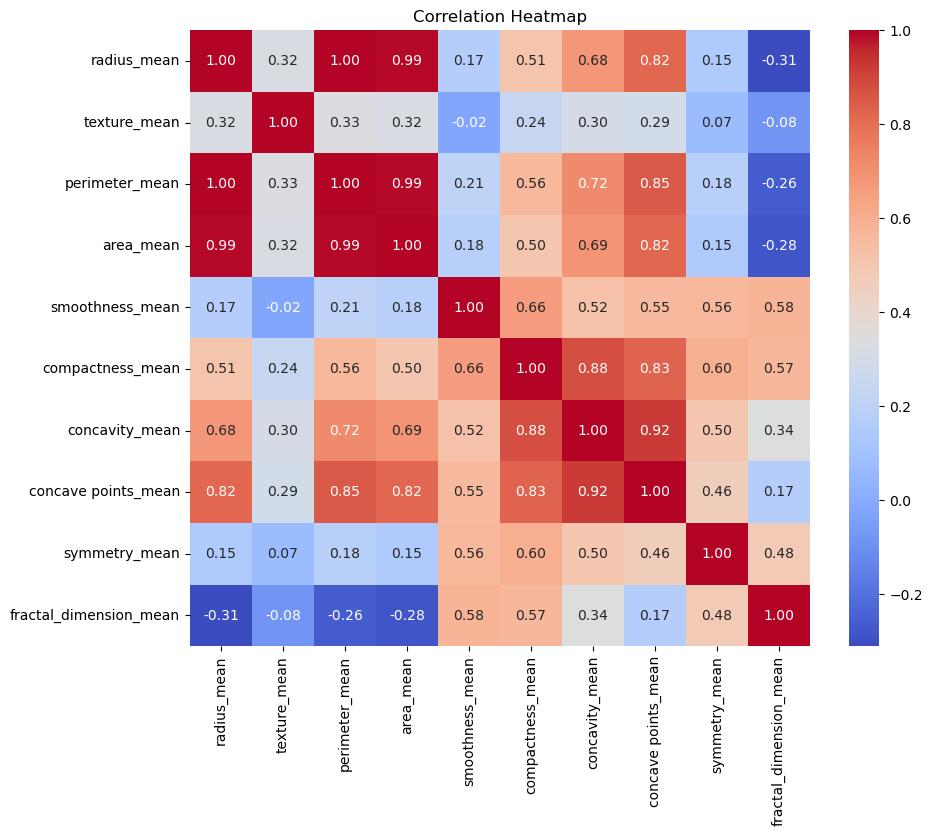

In [12]:
corr = data_mean.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

There is a high correlation among radius, area, and perimeter mean. This is expected, since radius is directly used to calculate both perimeter and area of a circle, and cysts are approximately circular in shape. Therefore, the area and perimeter columns are dropped from the dataset

In [13]:
data_mean=data_mean.drop(['area_mean','perimeter_mean'],axis=1)

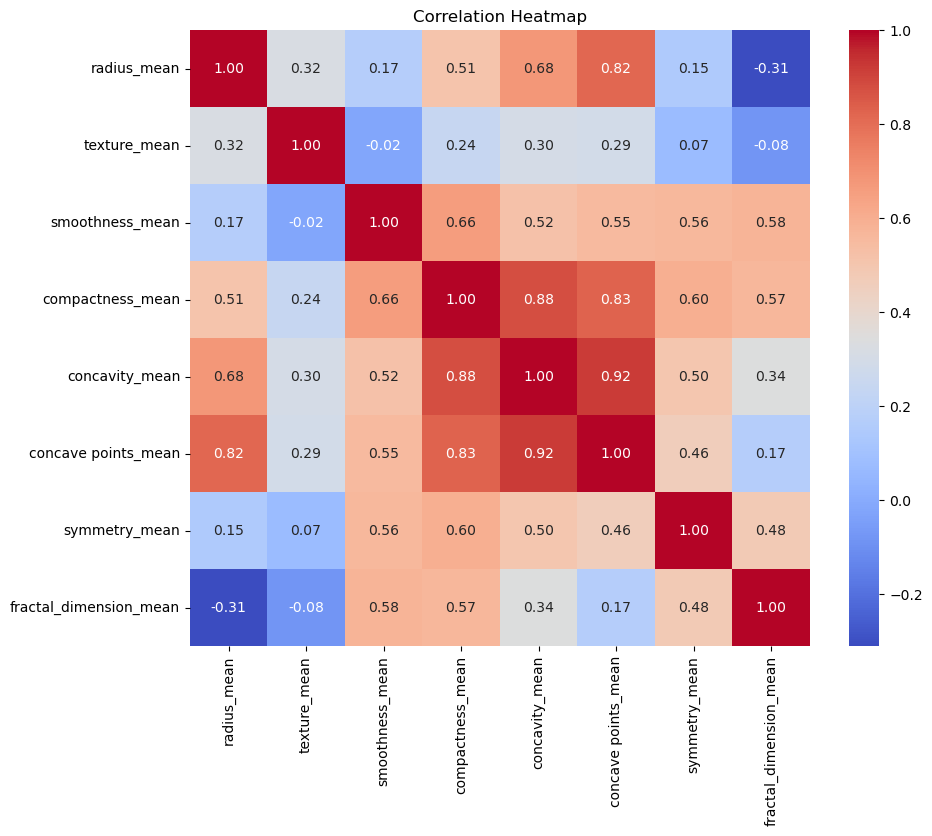

In [14]:
corr = data_mean.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Concavity, compactness, and concave are highly correlated with each other. To avoid redundancy, compactness is retained while the other two features are removed

In [15]:
data_mean=data_mean.drop(['concavity_mean','concave points_mean'],axis=1)

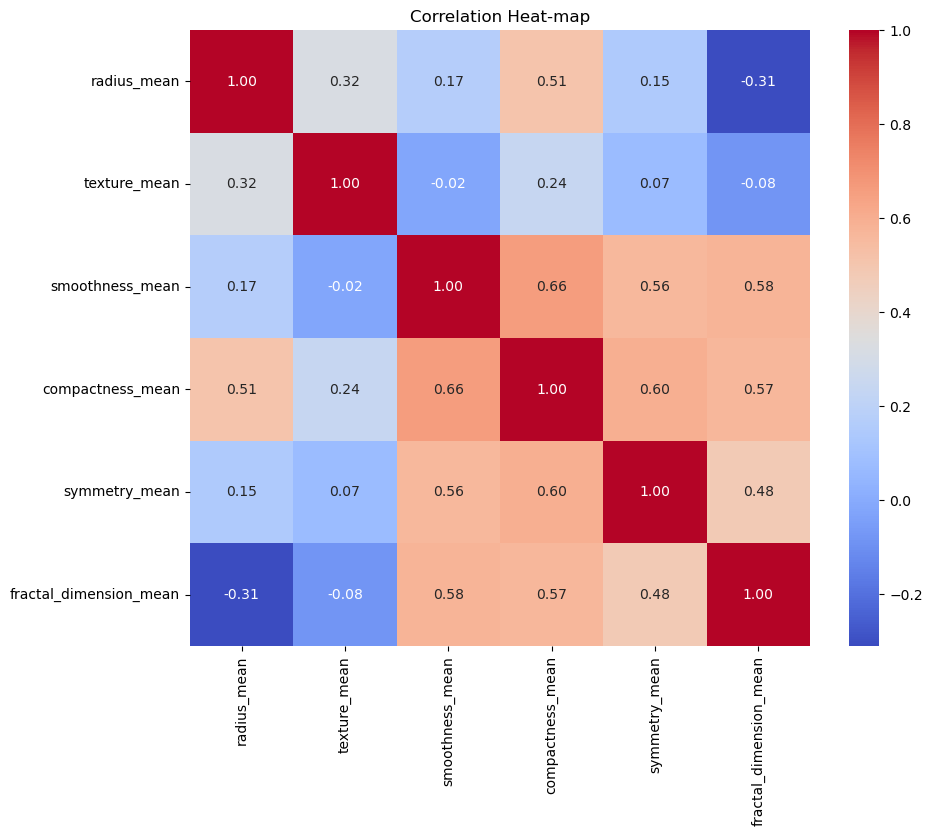

In [16]:
corr=data_mean.corr().round(2)
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heat-map')
plt.show()

This looks fine to move forward

Look at if similiar correlation exists for worst columns as well

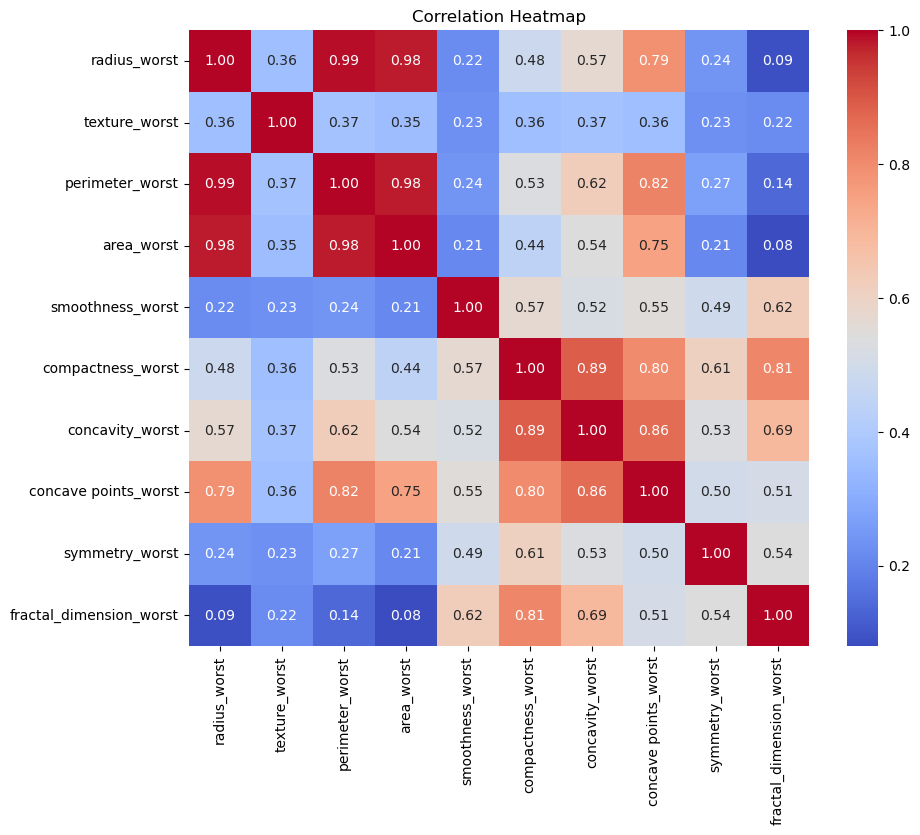

In [17]:
worst_cols=[cols for cols in data.columns if cols.endswith('worst')]
data_worst=data[worst_cols]
corr = data_worst.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

A similiar correlation exists for worst cols as well. 

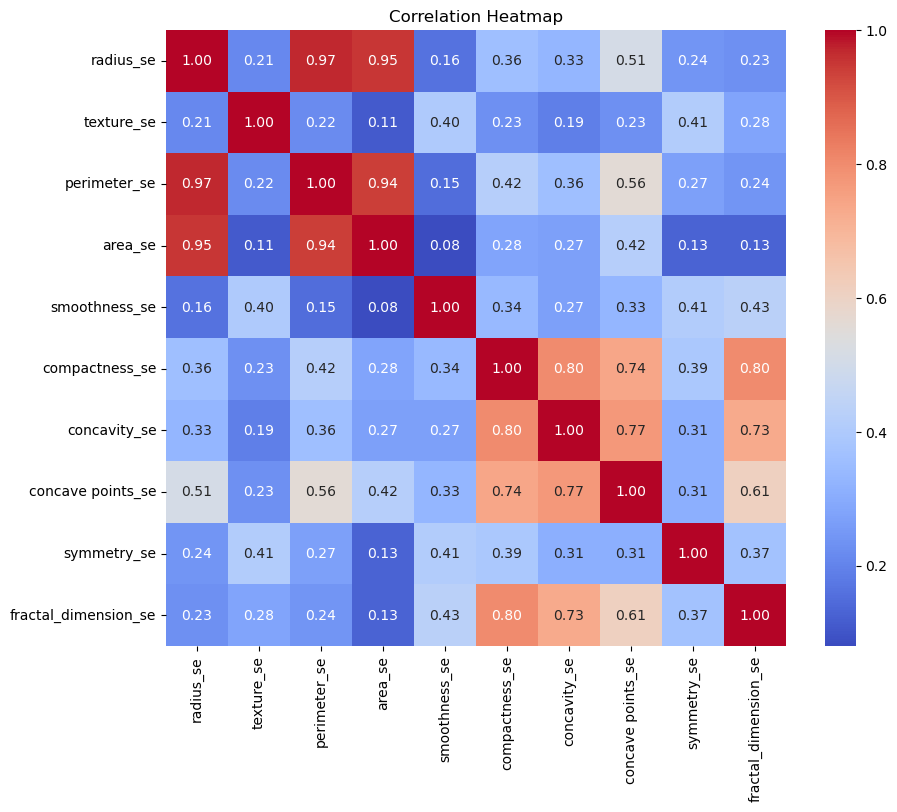

In [18]:
se_cols=[cols for cols in data.columns if cols.endswith('se')]
data_se=data[se_cols]
corr = data_se.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Similiar for se

So, removing all the columns that start with area,perimeter,concavity,concave points

In [19]:
cols=[cols for cols in data.columns if not cols.startswith(('area','perimeter','concavity','concave points'))]
data=data[cols]
print(cols)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']


Correlation among the mean, worst and se cols 

/var/folders/g9/qgc41ngn72166dpgb6kt699h0000gn/T/ipykernel_17801/2434850968.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr().round(2)


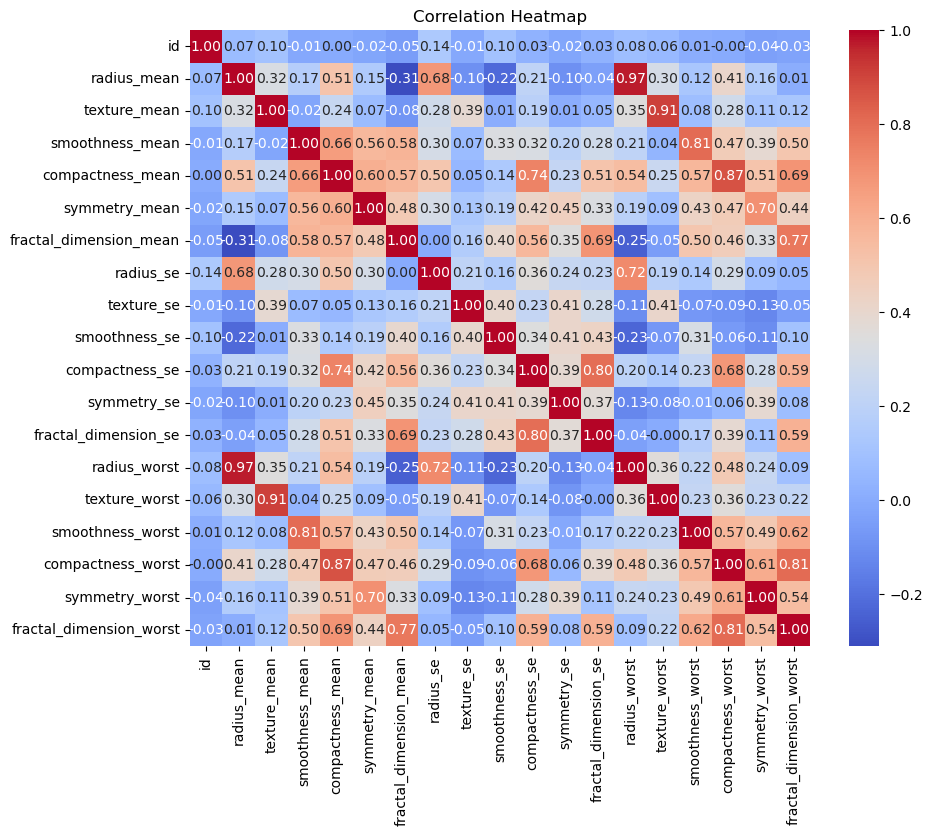

In [20]:
corr=data.corr().round(2)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Mean and worst cols have high correlation with each other. As worst are a subset of mean, removing all cols that end in worst

In [21]:
cols=[cols for cols in data.columns if not cols.endswith('worst')]
data=data[cols]
print(cols)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']


/var/folders/g9/qgc41ngn72166dpgb6kt699h0000gn/T/ipykernel_17801/2434850968.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr().round(2)


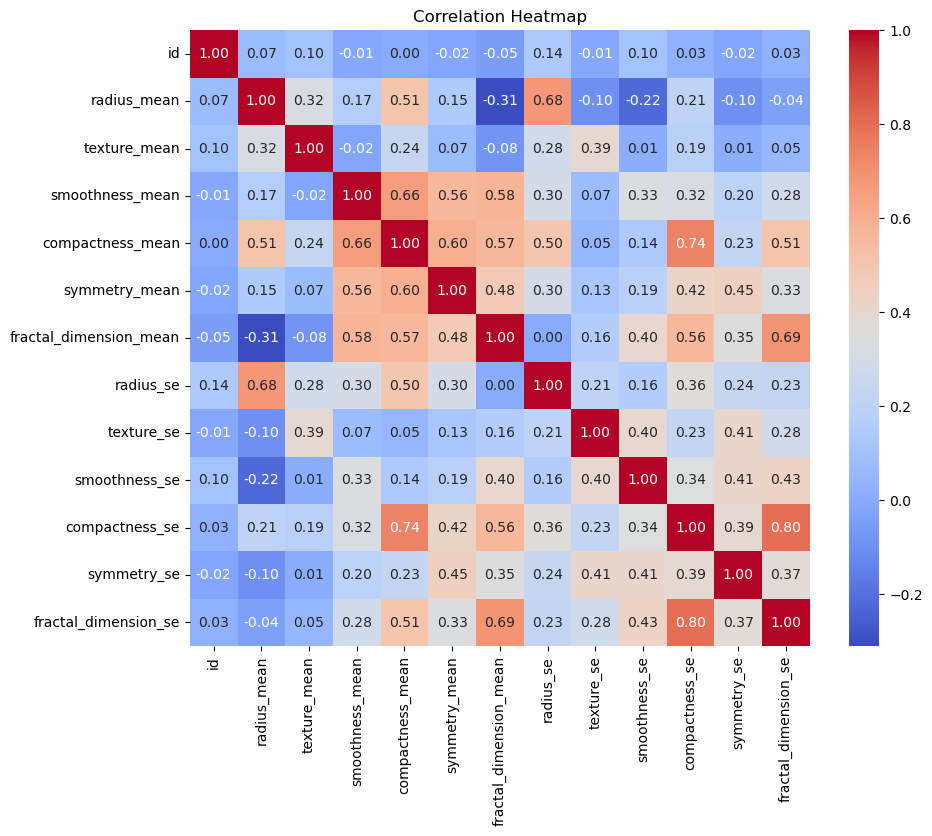

In [22]:
corr=data.corr().round(2)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

This looks fine as the correlation among all the se and mean columns are not an issue as much as between mean and worst cols

In [23]:
data.groupby('diagnosis').agg(['mean'])

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
diagnosis,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,0.092478,0.080085,0.174186,0.062867,0.284082,1.220380,0.007196,0.021438,0.020584,0.003636
M,3.681805e+07,17.462830,21.604906,0.102898,0.145188,0.192909,0.062680,0.609083,1.210915,0.006780,0.032281,0.020472,0.004062


All these values are showing variablility other than- smoothness_mean,fractal_dimensions_mean,texture_se,symmetry_se

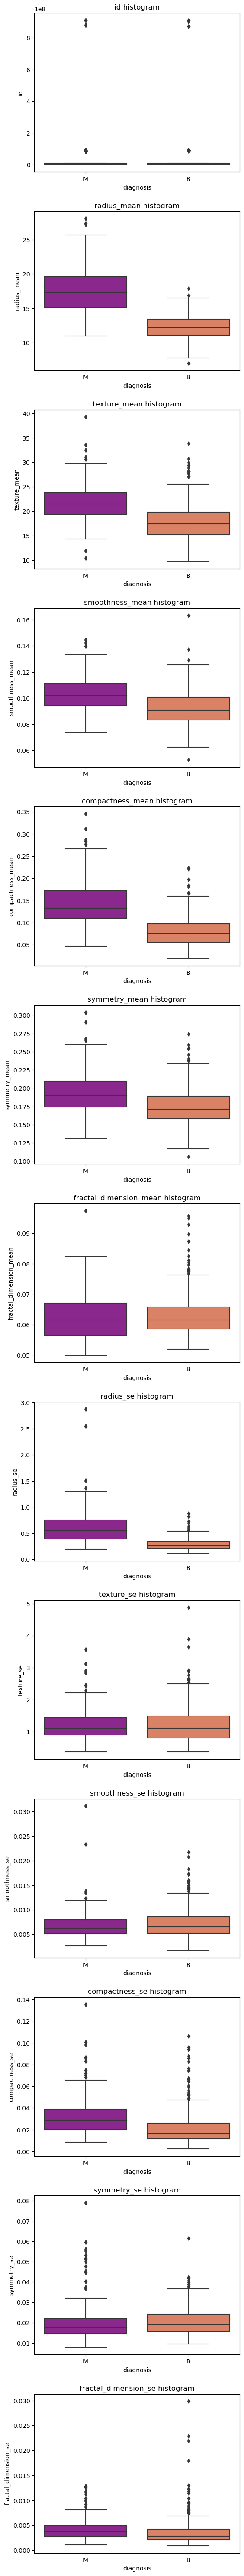

In [24]:
cols=data.columns
cols=[c for c in cols if c!='diagnosis']
l=len(cols)
plt.figure(figsize=(6,60))

for i in range(l):
    plt.subplot(l,1,i+1)
    sns.boxplot(x=data.diagnosis, y=data[cols[i]], palette=("plasma"))
    plt.title(cols[i]+' histogram')
plt.tight_layout(pad=2.0)
plt.show()

## Dummy Variable 

In [25]:
data.shape

(569, 14)

In [26]:
temp=pd.get_dummies(data.diagnosis,drop_first=True)
data=pd.concat([data,temp],axis=1)
data.drop('diagnosis',axis=1,inplace=True)
data.head()

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se,M
0,842302,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193,1
1,842517,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532,1
2,84300903,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571,1
3,84348301,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208,1
4,84358402,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115,1


## Training

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
np.random.seed(0)

In [29]:
df_train,df_test=train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

In [30]:
df_train.drop('id',axis=1,inplace=True)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_train=pd.DataFrame(scaler.fit_transform(df_train),columns=df_train.columns,index=df_train.index)

In [32]:
df_train.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se,M
18,0.607175,0.407266,0.412386,0.285323,0.310160,0.088549,0.232767,0.145156,0.162525,0.160137,0.105976,0.050179,1.0
213,0.494060,0.525260,0.433059,0.326074,0.147356,0.193076,0.149833,0.288808,1.000000,0.799804,0.258838,0.531076,1.0
532,0.317052,0.205882,0.362372,0.182077,0.339275,0.257213,0.031962,0.026498,0.071897,0.047778,0.049610,0.036521,0.0
191,0.273984,0.381661,0.314706,0.159681,0.376708,0.286507,0.222936,0.306710,0.097155,0.150248,0.482437,0.226731,0.0
235,0.333617,0.376125,0.343685,0.171461,0.271539,0.186196,0.051625,0.252564,0.192950,0.111169,0.088618,0.092428,0.0


In [33]:
y_train=df_train.pop('M')
x_train=df_train

## Builiding Model

In [34]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [35]:
def build_model(x,y):
    x=sm.add_constant(x)
    lm=sm.Logit(y,x).fit()
    print(lm.summary())
    p_values = lm.pvalues
    result = pd.DataFrame({
    "Column": p_values.index,
    "p-value": [f"{val:.6f}" for val in p_values.values],
    "Significant": ["Yes" if val <= 0.05 else "No" for val in p_values.values]
    })
    #print(result)
    return x,result

In [36]:
x_train,result=build_model(x_train,y_train)

Optimization terminated successfully.
         Current function value: 0.120422
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      M   No. Observations:                  398
Model:                          Logit   Df Residuals:                      385
Method:                           MLE   Df Model:                           12
Date:                Wed, 10 Sep 2025   Pseudo R-squ.:                  0.8156
Time:                        23:49:55   Log-Likelihood:                -47.928
converged:                       True   LL-Null:                       -259.90
Covariance Type:            nonrobust   LLR p-value:                 3.197e-83
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -24.6836      4.837     -5.103      0.000     -34.164     

In [37]:
# Significant=Yes is for the columns where p_value<0.05
significant_cols=result.loc[result['Significant']=='Yes','Column']
x_train=x_train[significant_cols]

In [38]:
x_train,result=build_model(x_train,y_train)

Optimization terminated successfully.
         Current function value: 0.136577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      M   No. Observations:                  398
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            5
Date:                Wed, 10 Sep 2025   Pseudo R-squ.:                  0.7909
Time:                        23:49:56   Log-Likelihood:                -54.358
converged:                       True   LL-Null:                       -259.90
Covariance Type:            nonrobust   LLR p-value:                 1.212e-86
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -24.9721      3.486     -7.163      0.000     -31.805     -18.139
radius_mean  

In [39]:
significant_cols=result.loc[result['Significant']=='Yes','Column']
x_train=x_train[significant_cols]

In [40]:
x_train,result=build_model(x_train,y_train)

Optimization terminated successfully.
         Current function value: 0.137680
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      M   No. Observations:                  398
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            4
Date:                Wed, 10 Sep 2025   Pseudo R-squ.:                  0.7892
Time:                        23:49:56   Log-Likelihood:                -54.797
converged:                       True   LL-Null:                       -259.90
Covariance Type:            nonrobust   LLR p-value:                 1.735e-87
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -25.3775      3.497     -7.256      0.000     -32.232     -18.523
radius_mean  

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
def check_vif(x):
    vif=pd.DataFrame()
    vif['Features']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF', ascending=False)
    return(vif)

In [43]:
check_vif(x_train)

,Features,VIF
0,const,17.97
3,smoothness_mean,1.44
4,symmetry_mean,1.39
1,radius_mean,1.16
2,texture_mean,1.13


We can move ahead of these columns now

In [44]:
x_train.head()

,const,radius_mean,texture_mean,smoothness_mean,symmetry_mean
18,1.0,0.607175,0.407266,0.412386,0.310160
213,1.0,0.494060,0.525260,0.433059,0.147356
532,1.0,0.317052,0.205882,0.362372,0.339275
191,1.0,0.273984,0.381661,0.314706,0.376708
235,1.0,0.333617,0.376125,0.343685,0.271539


## Prediction

In [45]:
scaler=MinMaxScaler()
df_test=pd.DataFrame(scaler.fit_transform(df_test),columns=df_test.columns,index=df_test.index)

In [46]:
y_test=df_test.pop('M')
x_test=df_test

In [47]:
x_test=sm.add_constant(x_test)
x_test=x_test[x_train.columns]

In [48]:
lm=sm.Logit(y_train,x_train).fit()
y_pred_prob = lm.predict(x_test)

Optimization terminated successfully.
         Current function value: 0.137680
         Iterations 10


In [49]:
y_pred_prob.head()

400    0.999994
225    0.020987
321    0.996437
173    0.000045
506    0.251831
dtype: float64

With the predicted probabilities for x_test, we can use the F1 metric to determine an optimal threshold where precision and recall are balanced

In [50]:
from sklearn.metrics import roc_curve

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [52]:
f1_list = []
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

for th in thresholds:
    y_pred = (y_pred_prob >= th).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_list.append([th, f1])
    
f1_scores = pd.DataFrame(f1_list, columns=["Threshold", "F1_Score"])
#print(f1_scores.sort_values('F1_Score',ascending=False))
thres = f1_scores.loc[f1_scores["F1_Score"].idxmax()]['Threshold']
print(thres)

0.323638361110529


It is important to note that the threshold was selected to balance precision and recall. However, business requirements may differ—for instance, it might be more critical to identify as many cancer-positive patients as possible, even if that requires sacrificing some precision. In such cases, a lower threshold would be chosen to maximize recall

In [53]:
y_pred=(y_pred_prob >= thres).astype(int)

In [54]:
pred_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted_Prob": y_pred_prob,
    "Predicted_Class": y_pred
})
print(pred_df.head())

     Actual  Predicted_Prob  Predicted_Class
400     1.0        0.999994                1
225     0.0        0.020987                0
321     1.0        0.996437                1
173     0.0        0.000045                0
506     0.0        0.251831                0


## Evaluation of Metrices

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
Confusion_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", Confusion_matrix)

Confusion Matrix:
 [[95  7]
 [ 7 62]]


In [57]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

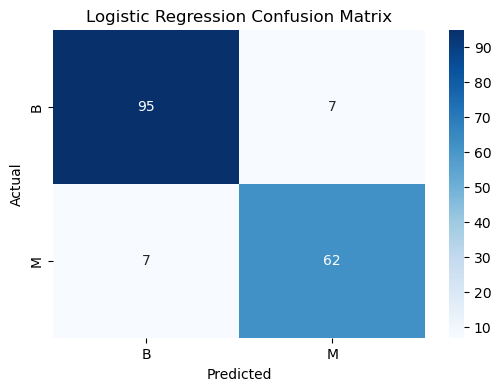

In [58]:
plot_confusion_matrix(Confusion_matrix, 'Logistic Regression')

From here we can see that all from all of predicted M, 62 are True Positives whereas 7 are false positives
giving the precision of 62/69=0.898. 

Recall, out of all 69 of acual M, 62 are predicted in the model. Hence, the recall- 62/69=0.898

In [59]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Accuracy : 0.9181286549707602
Precision: 0.8985507246376812
Recall   : 0.8985507246376812
F1 Score : 0.8985507246376812


In [60]:
from sklearn.metrics import roc_auc_score, roc_curve

In [61]:
auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC :", auc)

ROC-AUC : 0.970872406933788


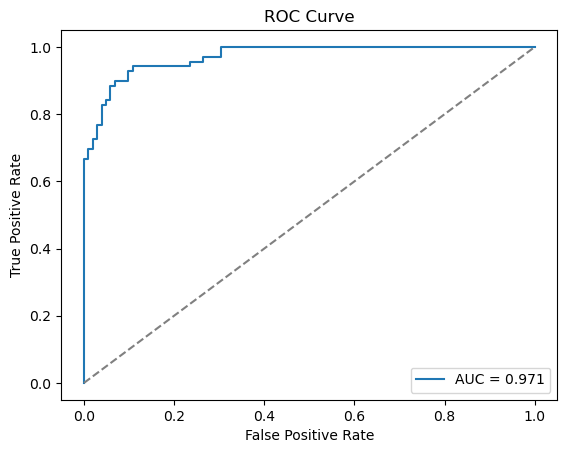

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

AUC of the ROC curve is used to compare different models

The model is able to predict ~90% of all the positive value with a precision of ~90%